# Pre-Processing

Now the following will be preparing the data for modeling, by creating dummies, scaling the data and split data into training and testing sets.

First I will upload the libraries necessary as well as the cleaned data.

In [41]:
import pandas as pd
import numpy as np

heart_data = pd.read_csv("cleaned_heart_disease_data.csv")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

Next I'll use X and y do define my features and target variable. while also defining my categorical and numerical features that will lead me to creat dummies as well as split my data.

In [4]:
X = heart_data.drop(columns=['num'])  
y = heart_data['num'] 

In [5]:
#Define categorical & numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

#Create a column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  
        ('cat', OneHotEncoder(), categorical_features)
    ])

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

After I use pipeline to start modeling.

# Modeling

I've chosen to go ahead and try the modeling with Random Forest, K-Nearest Neighbor and Gradient Boosting because I thought those 3 would match the best with the data I have, due to all 3 being able to handle multiple classes.

In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

##### Random Forest Classifier:

Used due to the fact that it is robust to overfitting due to averaging multiple decision trees and can handle both numerical and categorical data.

In [35]:
#Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#Predictions
rf_predictions = rf_model.predict(X_test)

#Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.5081967213114754


Confusion Matrix:
 [[28  0  1  0  0]
 [ 7  1  3  1  0]
 [ 4  2  1  2  0]
 [ 1  4  1  1  0]
 [ 0  2  0  2  0]]


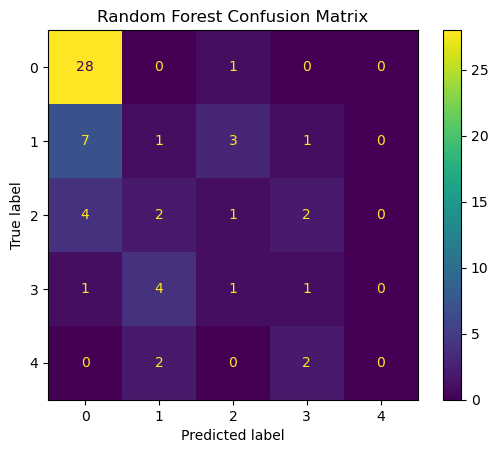

In [36]:
#Confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix:\n", rf_cm)

#Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

Random forest had a relatively low accuracy, which is at 0.5081. With the confusion matrix showing us that a lot was misclassified.

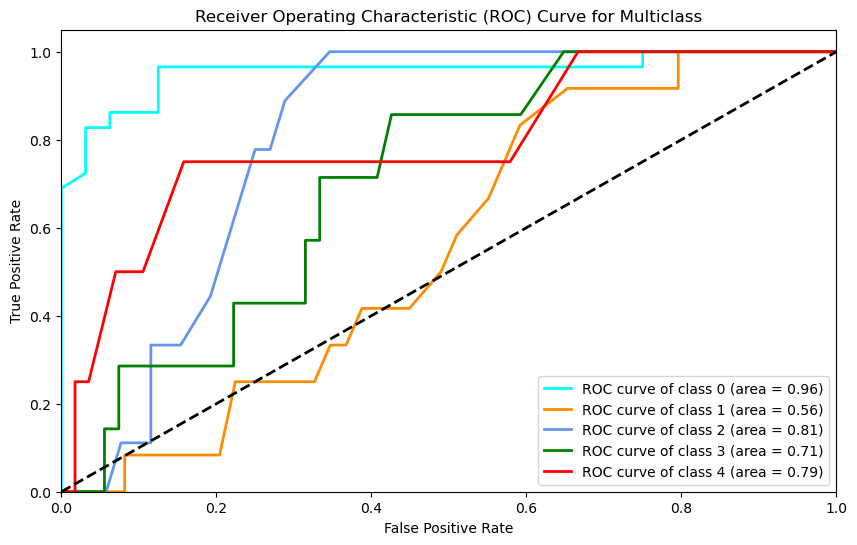

In [44]:
#Binarize the output
n_classes = len(np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Plot ROC curve for each class
plt.figure(figsize=(10, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()

The curves for this model are all above 50%, which tells us that Random Forest does well for each class.

###### K-Nearest Neighbors (KNN):

Simple and can naturally handle multiclass problems.

In [45]:
#Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

#Predictions
knn_predictions = knn_model.predict(X_test)

#Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.4426229508196721


Confusion Matrix:
 [[27  2  0  0  0]
 [10  0  2  0  0]
 [ 6  2  0  1  0]
 [ 4  2  1  0  0]
 [ 2  2  0  0  0]]


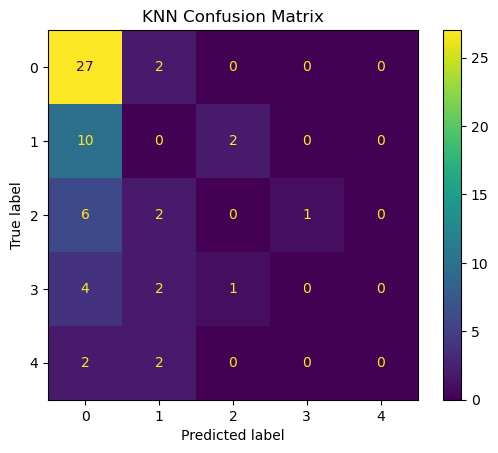

In [46]:
#Confusion matrix
knn_cm = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix:\n", knn_cm)

#Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm)
disp.plot()
plt.title('KNN Confusion Matrix')
plt.show()

KNN had an even lower accuracy, which is at 0.4426. With the confusion matrix showing us that a lot was misclassified.

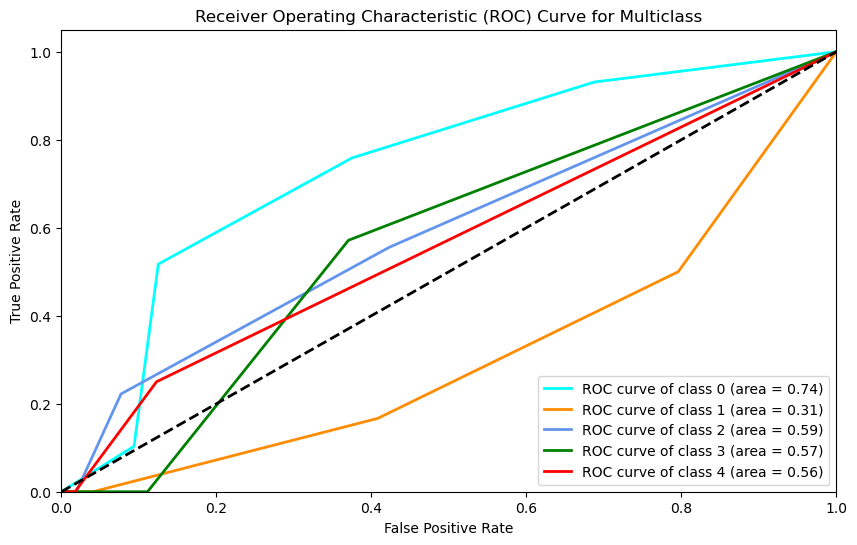

In [47]:
#Binarize the output
n_classes = len(np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], knn_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Plot ROC curve for each class
plt.figure(figsize=(10, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()

The curves for this model are all above average, but the curve for class one which is fully bellow 50%. 

###### Gradient Boosting Classifier:

Good to use with complex datasets as well has a higher accuracy than single decision trees.

In [48]:
#Train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

#Predictions
gb_predictions = gb_model.predict(X_test)

#Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.47540983606557374


Confusion Matrix:
 [[27  2  0  0  0]
 [ 7  1  4  0  0]
 [ 3  3  0  3  0]
 [ 0  3  3  1  0]
 [ 0  2  1  1  0]]


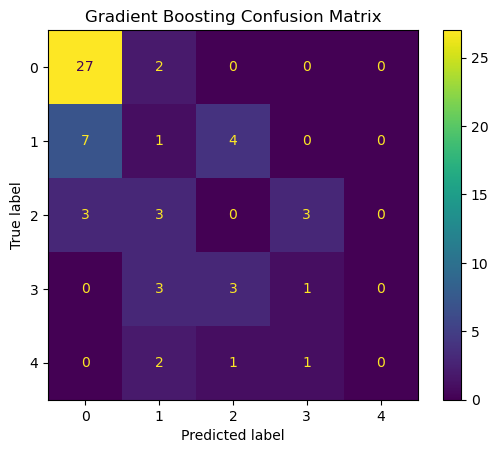

In [49]:
#Confusion matrix
gb_cm = confusion_matrix(y_test, gb_predictions)
print("Confusion Matrix:\n", gb_cm)

#Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=gb_cm)
disp.plot()
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

Gradient Boosting also had a low accuracy, which is at 0.4754. With the confusion matrix showing us that a lot was misclassified.

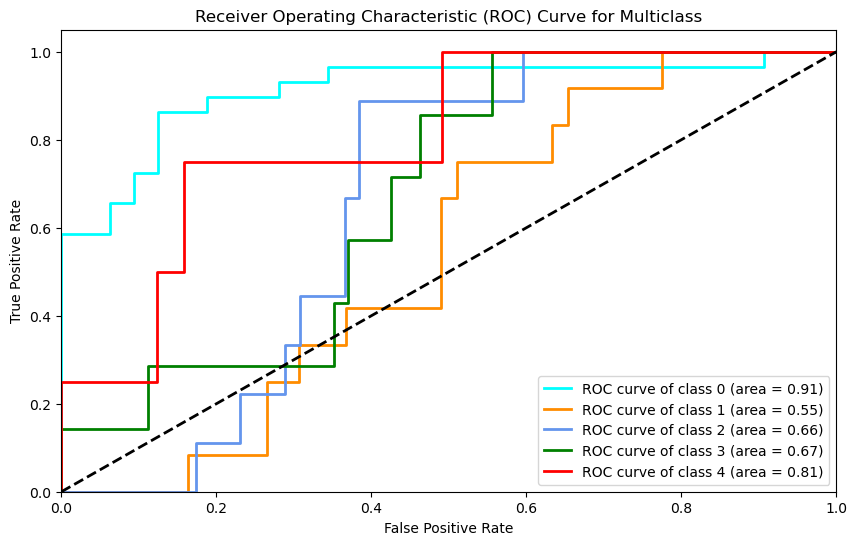

In [50]:
#Binarize the output
n_classes = len(np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], gb_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Plot ROC curve for each class
plt.figure(figsize=(10, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()

The curves are all above 50%, which shows how well Gradient Boosting does for each class.

# Summary & Conclusion

 I decided to try 3 different models for this exercise. The models I used include Random Forest, K-Nearest Neighbors, and Gradient Boosting Classifier. The model evaluation metrics used and individual results:
 
•	Confusion matrix and accuracy score were used to understand the distribution of true positives, true negatives, false positives, and false negatives, and measure the overall accuracy of the model. 
First, Gradient Boosting had a high accuracy for class 0 (27 correct predictions). However, struggles with classes 1 and 3, showing multiple misclassifications. KNN had good performance for class 0 (27 correct predictions), but poor performance for classes 1, 2, and 3, with significant misclassifications. While Random Forest had the highest accuracy for class 0 (28 correct predictions) and had a balanced performance across other classes, with fewer misclassifications than Gradient Boosting and KNN.

•	The other metrics used include the ROC Curve and AUC, to evaluate the model's ability to distinguish between classes.
Gradient Boosting and Random Forest both had high AUC values for class 0 (0.91), but Random Forest showed better performance across other classes with higher AUC values, indicating better discriminatory power. KNN had the lowest AUC values across all classes, indicating it is the least effective in distinguishing between classes.

In conclusion to optimize the prediction accuracy of heart disease presence, Random Forest is the most effective machine learning algorithm among those tested. It provides the highest accuracy, robust performance across different classes, and superior AUC values. This model's ability to handle both numerical and categorical data and its robustness against overfitting make it well-suited for this classification task. Future work could focus on further hyperparameter tuning and potentially integrating feature selection techniques to enhance the model's performance even further.